In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
BASE_DIR = '/mnt/rufus_A/multimemo'

In [4]:
# Read just first page from excel file
df = pd.read_excel(os.path.join(BASE_DIR, 'data/processed/memento_data_recaption_exp_emb_z_score_openai_embs.xlsx'), sheet_name='in')
print(df.shape)
df.head()

(500, 23)


,filename,url,mem_score,alpha,audio_description,captions,action_labels,actions,responses,recaptions,...,openai_caption_embeddings,openai_recaption_embeddings,mean_emb_distance_video,std_emb_distance_video,mean_emb_distance,caption_z_score,ERROR ID,ERROR,Comments,Remove?
0,clearing_flickr-8-7-9-7-5-1-1-1-5187975111_8.mp4,https://data.csail.mit.edu/soundnet/actions3/c...,0.837529,-0.001939,this is a video of a bulldozer knocking down t...,A construction site is going underway and is d...,"['ing', 'clearing', 'bulldozing', 'destroying'...","ing, clearing, bulldozing, destroying, knocking",[{'id': 'chatcmpl-7JoNzBl9kYR72EW5yTPUgWNiiCAl...,A heavy machinery transforms the terrain by le...,...,[-0.00457278 -0.02464931 -0.00815007 ... -0.02...,[-0.00678381 -0.02734889 0.00928767 ... -0.00...,0.882420,0.029964,0.847579,-1.162783,4.0,Caption mistakenly describes the scene,There is just a yellow crane which is not desc...,Yes
1,cleaning_flickr-8-1-3-5-0-3-6-5-5681350365_13.mp4,https://data.csail.mit.edu/soundnet/actions3/c...,0.989171,-0.000284,the lady is washing her camera off under the b...,The new and improved Canon camera It is water...,"['washing', 'rinsing', 'cleaning']","washing, rinsing, cleaning",[{'id': 'chatcmpl-7JoLYcRy5uljy9WtEXAFW2zeUDn6...,Testing the durability of the upgraded Canon c...,...,[-0.00300088 0.02196193 -0.00965095 ... -0.00...,[ 0.01005147 0.00331997 -0.00527329 ... -0.02...,0.906366,0.062259,0.830535,-1.217981,3.0,Caption does not describe the scene (subjective),NaN,Maybe
2,riding_4-4-6-4999054446.mp4,https://data.csail.mit.edu/soundnet/actions3/r...,0.779686,-0.002241,the camera sits behind a vehicle of some sort ...,point of view from the bed of an old pickup truck,"['riding', 'sitting', 'driving', 'wearing', 's...","riding, sitting, driving, wearing, swerving",[{'id': 'chatcmpl-7K6dWwoKfRfEhM9wr989uVcSTsJP...,Experience the thrill of a rural ride on the b...,...,[ 0.02562682 -0.01268798 0.00180715 ... 0.01...,[ 0.00071028 -0.01052072 0.02023781 ... -0.00...,0.896447,0.057794,0.829158,-1.164290,4.0,Caption mistakenly describes the scene,NaN,Yes
3,talking_flickr-0-6-6-5-3-4-0-2-7606653402_59.mp4,https://data.csail.mit.edu/soundnet/actions3/t...,0.804864,-0.000695,a woman wearing glasses is sitting up close to...,A young girl complaining how little she does i...,"['talking', 'speaking']","talking, speaking",[{'id': 'chatcmpl-7KCFCYJGrLttc0G7uSKb8YkNOthR...,A young cheerleader expressing her disappointm...,...,[-0.01980111 -0.00081296 0.01562432 ... 0.00...,[-0.03493531 -0.01338248 -0.00046222 ... -0.00...,0.849817,0.081768,0.750325,-1.216754,6.0,Caption refers to audio,NaN,Maybe
4,closing_flickr-1-5-6-3-7-2-7-7-14915637277_12.mp4,https://data.csail.mit.edu/soundnet/actions3/c...,0.664634,-0.001505,people swimming under the water is blue and wh...,happiness happiness cleanliness and good view ...,"['standing', 'flowing']","standing, flowing",[{'id': 'chatcmpl-7JosMa8WimXqpkfi7M6DIKVQVPtA...,Enjoying the beautiful surroundings with a ple...,...,[ 0.02682773 0.00394008 0.01174528 ... -0.00...,[ 0.01002434 0.01233364 0.01532598 ... -0.00...,0.852439,0.087465,0.746024,-1.216661,3.0,Caption does not describe the scene (subjective),NaN,Maybe


In [5]:
df['captions_emb_path'] = df['captions_emb_path'].apply(lambda x: os.path.join(BASE_DIR, x))

In [6]:
df['ERROR ID'].describe()

count    226.000000
mean       3.048673
std        2.042291
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: ERROR ID, dtype: float64

In [7]:
# Error ID is a categorical variable
# df['ERROR ID'] = df['ERROR ID'].astype('category')
# Show category distribution
# df['ERROR ID'].value_counts().plot(kind='bar')

In [8]:
# Show mapping between error id and error description
df[['ERROR ID', 'ERROR']].drop_duplicates().sort_values(by='ERROR ID')

,ERROR ID,ERROR
20,1.0,No error
5,2.0,Caption focuses on a different part of the scene
1,3.0,Caption does not describe the scene (subjective)
0,4.0,Caption mistakenly describes the scene
11,5.0,Caption does not belong to video
3,6.0,Caption refers to audio
13,7.0,Caption has a typo
26,8.0,Playback error
10,9.0,Caption includes external context
156,10.0,Unknown - Corrupt video


<Axes: xlabel='ERROR ID'>

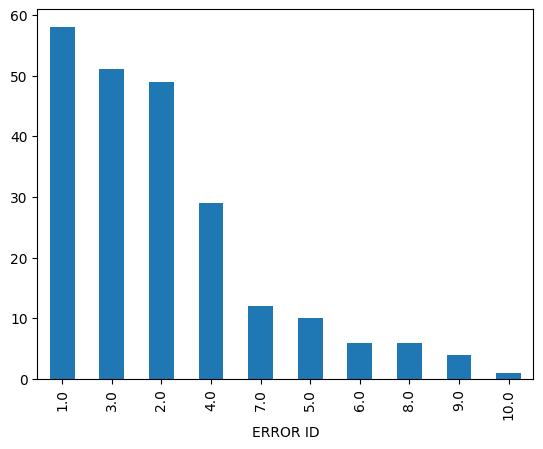

In [9]:
df['ERROR ID'].value_counts().plot(kind='bar')

In [10]:
pd.set_option('display.max_colwidth', None)
print(df[df['ERROR ID'] == 10][['captions','audio_description']])
pd.reset_option('display.max_colwidth')

                                                                        captions  \
156  A man with a yellow shirt looks into the camera as it moves around the room   

                                                                audio_description  
156  a family sitting down to dinner a woman is sitting down eating with the fork  


In [11]:
# Assign the sample with error id 10 to error id 4
df.loc[df['ERROR ID'] == 10, 'ERROR ID'] = 4
df['ERROR ID'] = df['ERROR ID'].astype('category')

In [12]:
df_filtered = df[df['ERROR ID'].notnull()]
df_filtered['ERROR ID'] = df_filtered['ERROR ID'].astype('category')
df_filtered.shape

/tmp/ipykernel_117189/1781534301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ERROR ID'] = df_filtered['ERROR ID'].astype('category')


(226, 23)

In [13]:
# PCA of openai caption embeddings for df_filtered
from sklearn.decomposition import PCA
df_filtered['openai_caption_embeddings'] = df_filtered['captions_emb_path'].apply(lambda x: np.load(x))
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_filtered['openai_caption_embeddings'].tolist())
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])
principalDf.head()

/tmp/ipykernel_117189/664958976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['openai_caption_embeddings'] = df_filtered['captions_emb_path'].apply(lambda x: np.load(x))


,pc1,pc2,pc3
0,-0.027909,0.096129,-0.022402
1,0.133402,0.034492,-0.085798
2,0.081848,0.102574,-0.071739
3,-0.034738,-0.147649,0.040898
4,0.299240,0.018377,0.129693


In [14]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.04336461 0.0372459  0.03154269]


In [15]:
# Scatter plot PCA with Error as color and memorability score as size. Show caption on hover
fig = px.scatter_3d(principalDf, x="pc1", y="pc2", z="pc3", color=df_filtered['ERROR'].tolist(), size=df_filtered['mem_score'].tolist(), hover_name=df_filtered['captions'].tolist())
fig.show()

In [16]:
df_filtered['subjective'] = df_filtered['ERROR ID'].apply(lambda x: 'yes' if x==3 else 'no')

fig = px.scatter_3d(principalDf, x="pc1", y="pc2", z="pc3", color=df_filtered['subjective'].tolist(), size=df_filtered['mem_score'].tolist(), hover_name=df_filtered['captions'].tolist())
fig.show()

/tmp/ipykernel_117189/2446894959.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
# Scatter plot PCA with remove as color and memorability score as size
df_filtered['Remove?'] = df_filtered['Remove?'].astype('category')
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color=df_filtered['Remove?'], size=df_filtered['mem_score'])
fig.show()

/tmp/ipykernel_117189/3579548486.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [18]:
# Plot n_components vs explained_variance_ratio_ for PCA
pca_226 = PCA(n_components=226)
pca_226.fit(df_filtered['openai_caption_embeddings'].tolist())
fig = px.line(x=np.arange(1, 227), y=np.cumsum(pca_226.explained_variance_ratio_))
fig.show()

In [19]:
# Compute PCA for 128 components
pca_128 = PCA(n_components=128)
pca_128.fit(df_filtered['openai_caption_embeddings'].tolist())
principalComponents_128 = pca_128.transform(df_filtered['openai_caption_embeddings'].tolist())

In [20]:
# Train test split (Balance beween error ids)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalComponents_128, df_filtered['ERROR ID'], test_size=0.2, random_state=42, stratify=df_filtered['ERROR ID'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(180, 128) (46, 128) (180,) (46,)


In [21]:
# Build a KNN model with 128 components to predict ERROR ID
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5c33bc4670>
Traceback (most recent call last):
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.3695652173913043
[[5 6 0 1 0 0 0 0 0]
 [4 5 0 1 0 0 0 0 0]
 [2 2 5 1 0 0 0 0 0]
 [3 2 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         1.0       0.29      0.42      0.34        12
         2.0       0.28      0.50      0.36        10
         3.0       0.83      0.50      0.62        10
         4.0       0.25      0.17      0.20         6
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         3
         8.0       1.00      1.00      1.00         1
         9.0       0.00      0.00      0.00         1

    accuracy                           0.37        46
   macro avg       0.30      0.29      0.28        46
weighted avg       0.37      0.37      0.35        46



/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[5 6 0 1 0 0 0 0 0]
 [4 5 0 1 0 0 0 0 0]
 [2 2 5 1 0 0 0 0 0]
 [3 2 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]]


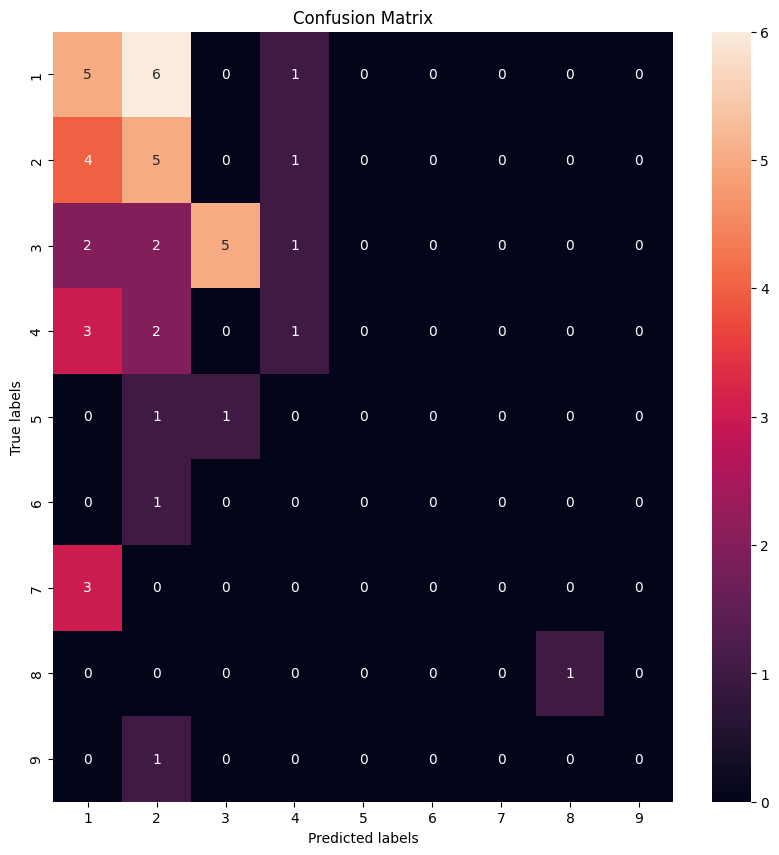

In [22]:
# Plot confusion matrix via matplotlib
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()
                          

In [23]:
# Use KNN to predict Remove? column
X_train, X_test, y_train, y_test = train_test_split(principalComponents_128, df_filtered['Remove?'], test_size=0.2, random_state=42, stratify=df_filtered['Remove?'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5c3410f7f0>
Traceback (most recent call last):
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(180, 128) (46, 128) (180,) (46,)
0.5217391304347826
[[ 5  7  3]
 [ 1 14  7]
 [ 1  3  5]]
              precision    recall  f1-score   support

       Maybe       0.71      0.33      0.45        15
          No       0.58      0.64      0.61        22
         Yes       0.33      0.56      0.42         9

    accuracy                           0.52        46
   macro avg       0.54      0.51      0.49        46
weighted avg       0.58      0.52      0.52        46



[[ 5  7  3]
 [ 1 14  7]
 [ 1  3  5]]


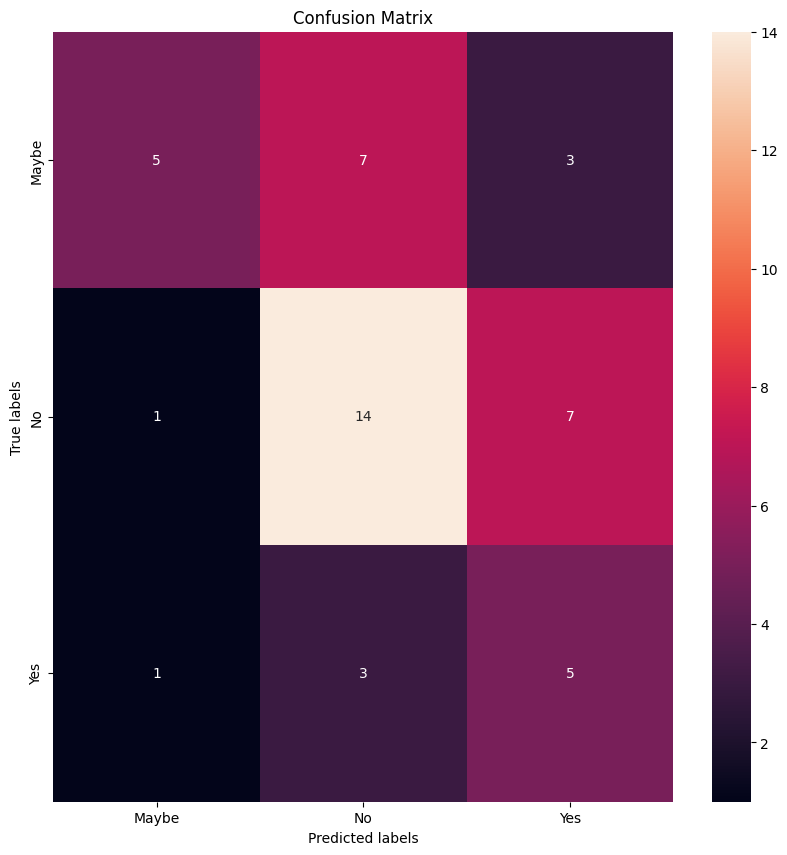

In [24]:
# Plot confusion matrix via matplotlib
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Maybe', 'No', 'Yes'])
ax.yaxis.set_ticklabels(['Maybe', 'No', 'Yes'])
plt.show()

In [25]:
# Use pca128 to predict subjective
X_train, X_test, y_train, y_test = train_test_split(principalComponents_128, df_filtered['subjective'], test_size=0.2, random_state=42, stratify=df_filtered['subjective'])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5c33b9a170>
Traceback (most recent call last):
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/imartinf/miniconda3/envs/memo/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0.9347826086956522
[[36  0]
 [ 3  7]]
              precision    recall  f1-score   support

          no       0.92      1.00      0.96        36
         yes       1.00      0.70      0.82        10

    accuracy                           0.93        46
   macro avg       0.96      0.85      0.89        46
weighted avg       0.94      0.93      0.93        46



In [27]:
# Show the mapping between ERROR and Remove?
df_filtered[['ERROR', 'Remove?']].drop_duplicates().sort_values(by='ERROR')


,ERROR,Remove?
11,Caption does not belong to video,Yes
1,Caption does not describe the scene (subjective),Maybe
5,Caption focuses on a different part of the scene,No
13,Caption has a typo,Maybe
10,Caption includes external context,Maybe
0,Caption mistakenly describes the scene,Yes
3,Caption refers to audio,Maybe
20,No error,No
26,Playback error,Yes
156,Unknown - Corrupt video,Yes
